In [1]:
import dask.dataframe as dd

# Read CSV using Dask
data = dd.read_csv("E:/semester8/Grad2/dataset_after_oversampling/binary_classification.csv")

# Use .compute() to execute operations and get the information
data_info = data.compute().info()
print(data_info)

# Get the number of rows and columns using .compute()
num_rows, num_columns = data.compute().shape
print("Number of rows4:", num_rows)
print("Number of columns4:", num_columns)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 34977995 entries, 0 to 401404
Data columns (total 17 columns):
 #   Column           Dtype  
---  ------           -----  
 0   TP2              float64
 1   TP3              float64
 2   H1               float64
 3   DV_pressure      float64
 4   Reservoirs       float64
 5   Oil_temperature  float64
 6   Flowmeter        float64
 7   Motor_current    float64
 8   COMP             float64
 9   DV_eletric       float64
 10  Towers           float64
 11  MPG              float64
 12  LPS              float64
 13  Pressure_switch  float64
 14  Oil_level        float64
 15  Caudal_impulses  float64
 16  status           int64  
dtypes: float64(16), int64(1)
memory usage: 4.7 GB
None
Number of rows4: 34977995
Number of columns4: 17


In [2]:
print(data.columns)

Index(['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature',
       'Flowmeter', 'Motor_current', 'COMP', 'DV_eletric', 'Towers', 'MPG',
       'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses', 'status'],
      dtype='object')


In [3]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import seaborn as sns
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [4]:

print(data.describe().round(2))
print(data.columns)

Dask DataFrame Structure:
                   TP2      TP3       H1 DV_pressure Reservoirs Oil_temperature Flowmeter Motor_current     COMP DV_eletric   Towers      MPG      LPS Pressure_switch Oil_level Caudal_impulses   status
npartitions=1                                                                                                                                                                                            
               float64  float64  float64     float64    float64         float64   float64       float64  float64    float64  float64  float64  float64         float64   float64         float64  float64
                   ...      ...      ...         ...        ...             ...       ...           ...      ...        ...      ...      ...      ...             ...       ...             ...      ...
Dask Name: round, 74 graph layers
Index(['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature',
       'Flowmeter', 'Motor_current', 'COMP', 'DV_eletric'

In [5]:
print(data.head(10))

     TP2    TP3     H1  DV_pressure  Reservoirs  Oil_temperature  Flowmeter  \
0 -0.012  9.758  9.760       -0.028       1.576           63.350  19.049625   
1 -0.012  9.760  9.760       -0.028       1.578           63.250  19.049625   
2 -0.010  9.760  9.760       -0.028       1.578           63.325  19.040281   
3 -0.012  9.756  9.756       -0.030       1.576           63.200  19.040281   
4 -0.012  9.756  9.756       -0.030       1.578           63.150  19.049625   
5 -0.012  9.754  9.754       -0.030       1.576           63.075  19.049625   
6 -0.012  9.754  9.754       -0.028       1.578           63.000  19.049625   
7 -0.010  9.752  9.754       -0.028       1.576           63.075  19.040281   
8 -0.012  9.752  9.752       -0.028       1.576           63.075  19.049625   
9 -0.010  9.750  9.750       -0.028       1.576           63.000  19.049625   

   Motor_current  COMP  DV_eletric  Towers  MPG  LPS  Pressure_switch  \
0         3.9550   1.0         0.0     1.0  1.0  0.0     

In [6]:
data.corr().round(2)

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Flowmeter,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,status
npartitions=1,,,,,,,,,,,,,,,,,
COMP,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
status,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


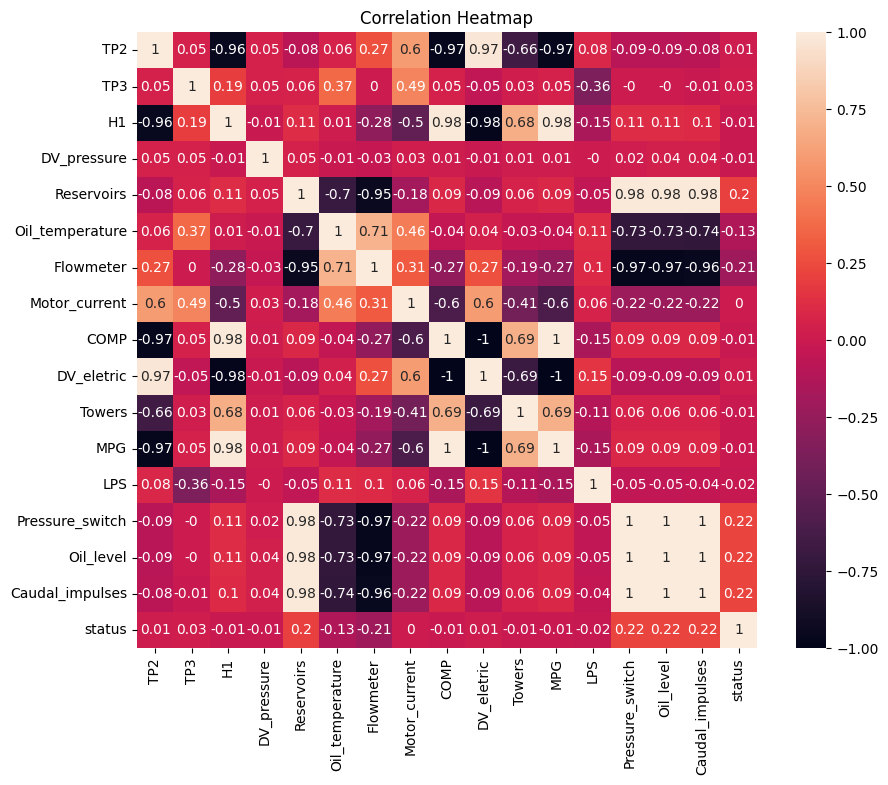

In [13]:
data_pd = data.compute()
# Compute the correlation matrix
correlation_matrix = data_pd.corr().round(2)

# Create the heatmap using Pandas DataFrame
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True )
plt.title('Correlation Heatmap')
plt.show()